In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
import statsmodels.api as sm
pd.options.display.float_format = '{:.5f}'.format

In [15]:
df = pd.read_csv("Assignment-3\Covid testing details.csv")
df.head()

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,update_time,data_source,country_code,region,country_flag
0,Hubei,China,35.86166,104.19540,729,39.00000,nan,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
1,Guangdong,China,35.86166,104.19540,53,0.00000,nan,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
2,Zhejiang,China,35.86166,104.19540,43,0.00000,nan,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
3,Beijing,China,35.86166,104.19540,36,0.00000,nan,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png
4,Chongqing,China,35.86166,104.19540,27,0.00000,nan,2020-01-24 14:55:00,bno,CHN,Asia,https://www.countryflags.io/cn/flat/64.png


<AxesSubplot:>

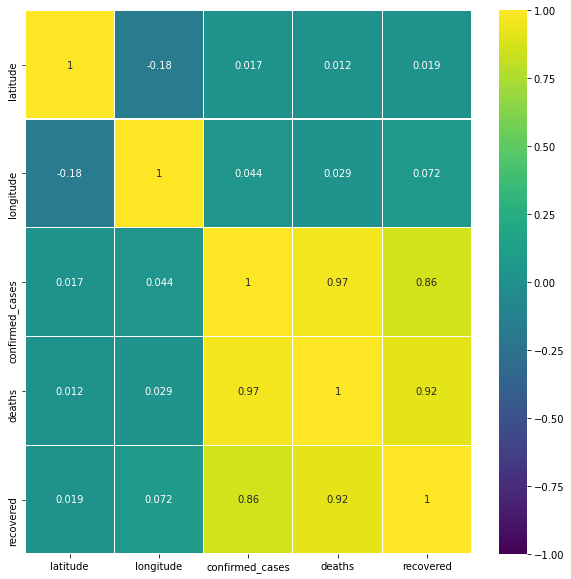

In [16]:
df_kor = df.corr()
plt.figure(figsize=(10,10))
sb.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [17]:
df.dtypes

province            object
country             object
latitude           float64
longitude          float64
confirmed_cases      int64
deaths             float64
recovered          float64
update_time         object
data_source         object
country_code        object
region              object
country_flag        object
dtype: object

In [18]:
df['country_flag'].astype('str')

0        https://www.countryflags.io/cn/flat/64.png
1        https://www.countryflags.io/cn/flat/64.png
2        https://www.countryflags.io/cn/flat/64.png
3        https://www.countryflags.io/cn/flat/64.png
4        https://www.countryflags.io/cn/flat/64.png
                            ...                    
24786    https://www.countryflags.io/us/flat/64.png
24787                                           nan
24788    https://www.countryflags.io/ci/flat/64.png
24789    https://www.countryflags.io/gr/flat/64.png
24790    https://www.countryflags.io/us/flat/64.png
Name: country_flag, Length: 24791, dtype: object

In [19]:
df['data_source'].astype('str')
df.drop(["country_flag","data_source"], inplace = True, axis = 1)

In [20]:
df.head(3)

,province,country,latitude,longitude,confirmed_cases,deaths,recovered,update_time,country_code,region
0,Hubei,China,35.86166,104.19540,729,39.00000,nan,2020-01-24 14:55:00,CHN,Asia
1,Guangdong,China,35.86166,104.19540,53,0.00000,nan,2020-01-24 14:55:00,CHN,Asia
2,Zhejiang,China,35.86166,104.19540,43,0.00000,nan,2020-01-24 14:55:00,CHN,Asia


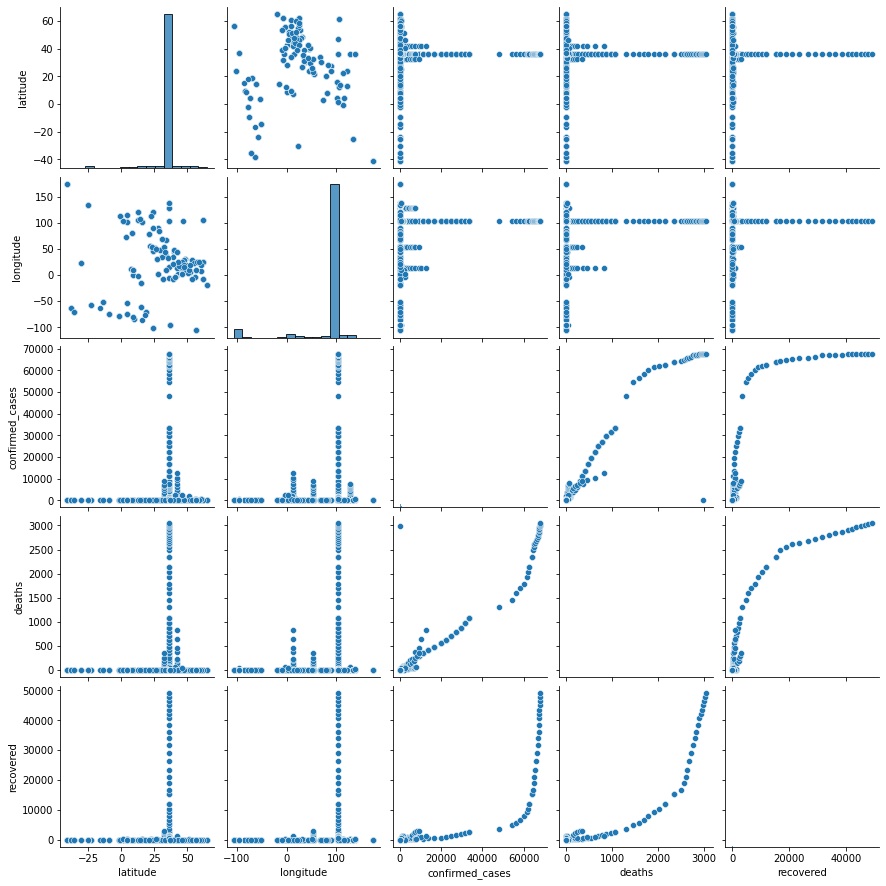

In [21]:
sb.pairplot(df)

In [22]:
df.isnull().sum()

province            2308
country                0
latitude              93
longitude             93
confirmed_cases        0
deaths                 6
recovered          19856
update_time            0
country_code          69
region                69
dtype: int64

In [23]:
df.dropna(inplace=True)
df.isnull().sum()

province           0
country            0
latitude           0
longitude          0
confirmed_cases    0
deaths             0
recovered          0
update_time        0
country_code       0
region             0
dtype: int64

In [24]:
Y=df["confirmed_cases"]

X2=df[["deaths", "recovered"]]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y, test_size = 0.2, random_state = 465)

In [25]:
print('Training Data Count:', X2_train.shape)
print('Testing Data Count::', X2_test.shape) 
print(y2_test.shape)
print(y2_train.shape)

Training Data Count: (2464, 2)
Testing Data Count:: (616, 2)
(616,)
(2464,)


In [26]:
X2_train = sm.add_constant(X2_train)

results2 = sm.OLS(y2_train, X2_train).fit() 

In [27]:
X2_test = sm.add_constant(X2_test)

y2_preds = results2.predict(X2_test)
y2_preds

22070   171.72149
20249   183.45497
22464   236.85933
19967   184.23720
22692    73.01581
           ...   
21077   149.14306
20110   184.23720
20970   184.23720
21193   208.59269
20313   184.23720
Length: 616, dtype: float64

In [28]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X2_train, y2_train)
Y_pred = linear_reg.predict(X2_test)
value_log= round(linear_reg.score(X2_train, y2_train) * 100, 2)
value_log

99.13

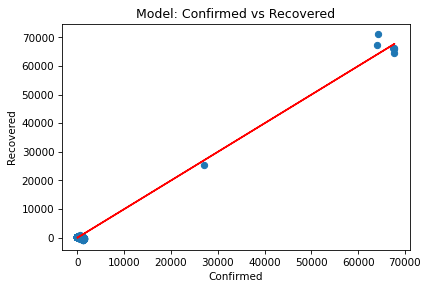

In [29]:
plt.figure(dpi = 75)
plt.scatter(y2_test, y2_preds)
plt.plot(y2_test, y2_test, color="red")
plt.xlabel("Confirmed")
plt.ylabel("Recovered")
plt.title("Model: Confirmed vs Recovered")
plt.show()